In [1]:
%matplotlib inline
import math
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from pandas import ExcelWriter
import pickle
import scipy as sp

In [2]:
def load_object(filename):
    with open(filename, 'rb') as fid:
        file = pickle.load(fid)
    return file

In [125]:
def index(data, label):
    mini = data.reset_index()[data.reset_index()['labels'] == label].index.min()
    maxi = data.reset_index()[data.reset_index()['labels'] == label].index.max()
    return mini,maxi

In [126]:
def non_zero_data(data):
    #data = data.drop(columns = "ID")
    non_zero_rows = data.abs().sum(axis=1) > 0.0
    non_zero_data = data[non_zero_rows]
    #non_zero_columns = non_zero_data.abs().sum(axis=0) > 0.0
    #non_zero_data = non_zero_data.loc[: , non_zero_columns]
    return non_zero_data

#put multiple DFs together with the key
def combineddf(dflist, dfkeys, ELEMENTS, noise = None, coefficient = None,):
    #make an empty list
    combinedlist = []
    #make an empty dataframe
    combineddf12 = pd.DataFrame()

    for i,j in zip(dflist, dfkeys):
        if noise == None and coefficient == None:
            df = non_zero_data(i[ELEMENTS])
            #fillnan with 0
            df[np.isnan(df)] = 0
        else:
            #add noise
            df = addnoise(i[ELEMENTS], noise, coefficient)


        df['labels'] = j
        combinedlist.append(df)
        combineddf12 = pd.concat([combineddf12, df])
    return combineddf12

ELEMENTS = ['48Ti', '53Cr', '55Mn', '54Fe', '59Co', '58Ni', '63Cu', '64Zn', '69Ga', '72Ge', '75As', '78Se', '85Rb', '88Sr', '89Y', '90Zr', '93Nb', 
           '98Mo', '108Pd', '107Ag', '114Cd', '120Sn', '121Sb', '130Te', '133Cs', '138Ba', '139La', '140Ce', '152Sm', '153Eu', '158Gd', '159Tb', '164Dy', '165Ho',
           '166Er', '169Tm', '174Yb', '175Lu', '180Hf', '185Re', '192Os', '193Ir', '195Pt', '197Au', '202Hg', '208Pb', '238U', '51V']

In [127]:
#load the codes
Qian2016codes = load_object('models/multipleLDAmodels/Qian2016codes_5.pkl')
Qian2018codes = load_object('models/multipleLDAmodels/Qian2018codes_5.pkl')
QianU2019codes = load_object('models/multipleLDAmodels/QianU2019codes_5.pkl')
QianR2019codes = load_object('models/multipleLDAmodels/QianR2019codes_5.pkl')
Sourcetrainingcodes = load_object('models/multipleLDAmodels/Sourcesamples_trainingcodes_5.pkl')
Sourcetestingcodes = load_object('models/multipleLDAmodels/Sourcesamples_testingcodes_5.pkl')

Qian2016, Qian2016keys = load_object('models/multipleLDAmodels/Qian2016DF_5.pkl')
Qian2018, Qian2018keys = load_object('models/multipleLDAmodels/Qian2018DF_5.pkl')
QianU2019, QianU2019keys = load_object('models/multipleLDAmodels/QianU2019DF_5.pkl')
QianR2019, QianR2019keys = load_object('models/multipleLDAmodels/QianR2019DF_5.pkl')
Sourcetraining, Sourcekeys = load_object('models/multipleLDAmodels/SourcetrainingDF_5.pkl')
Sourcetesting, Sourcekeys = load_object('models/multipleLDAmodels/SourcetestingDF_5.pkl')

In [128]:
Sourcetrainingdf = combineddf(Sourcetraining, Sourcekeys, ELEMENTS)

# transform data and see confidence for each model

(0.0001, 5)
(0.0001, 10)
(0.01, 5)
(0.01, 10)
(0.01, 15)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.01, 30)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.01, 50)
(0.1, 5)
(0.1, 10)
(0.1, 15)
(0.1, 30)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.1, 50)
(0.0001, 15)
(0.9, 5)
(0.9, 10)
(0.9, 15)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.9, 30)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.9, 50)
(0.0001, 30)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0001, 50)


<ipython-input-131-4e8086df95a3>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (22,5))


(0.001, 5)
(0.001, 10)
(0.001, 15)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.001, 30)


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.001, 50)


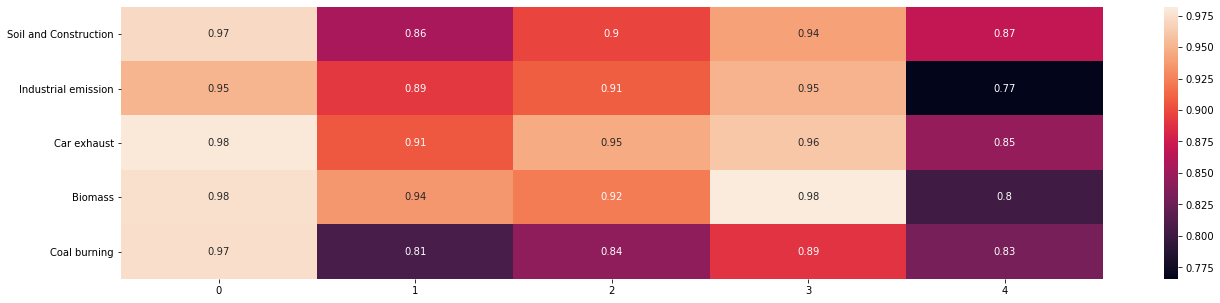

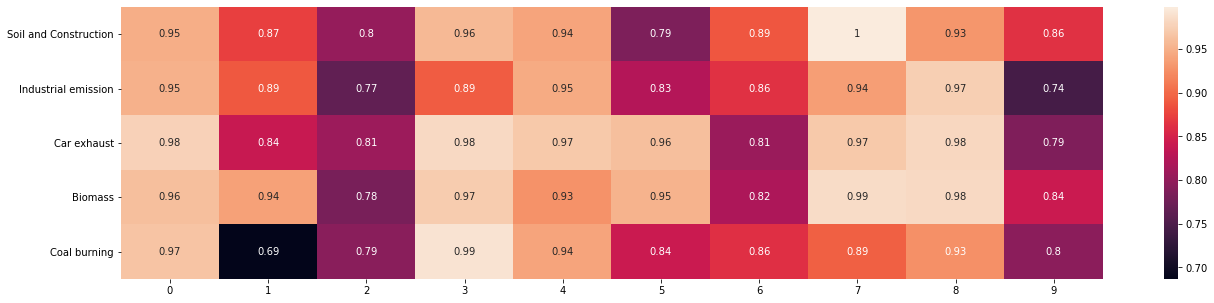

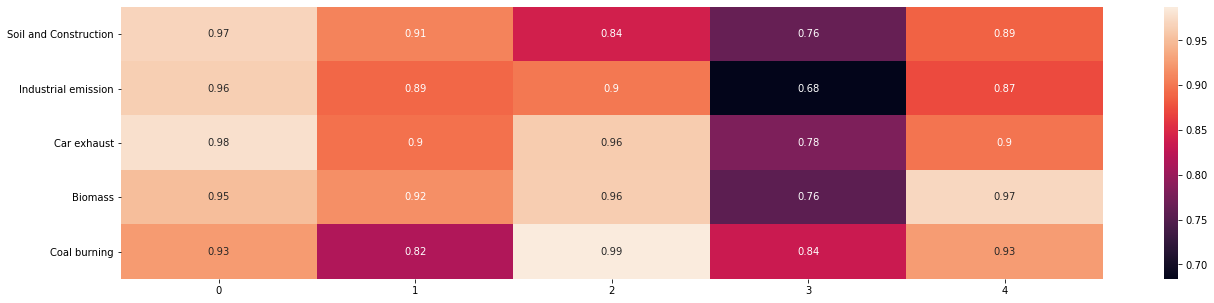

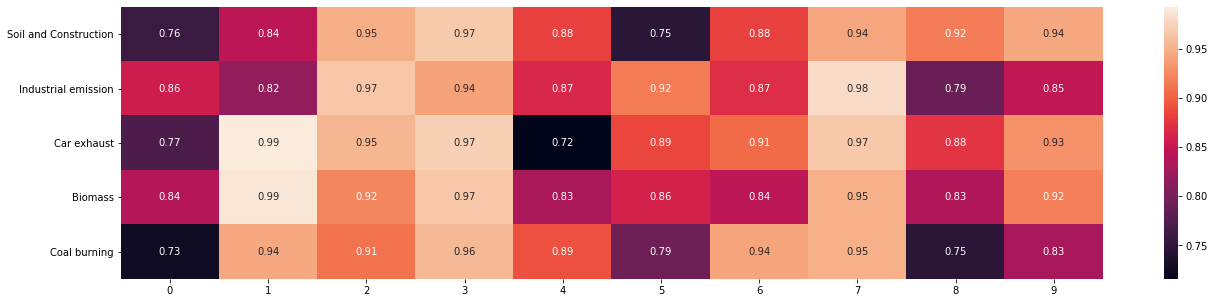

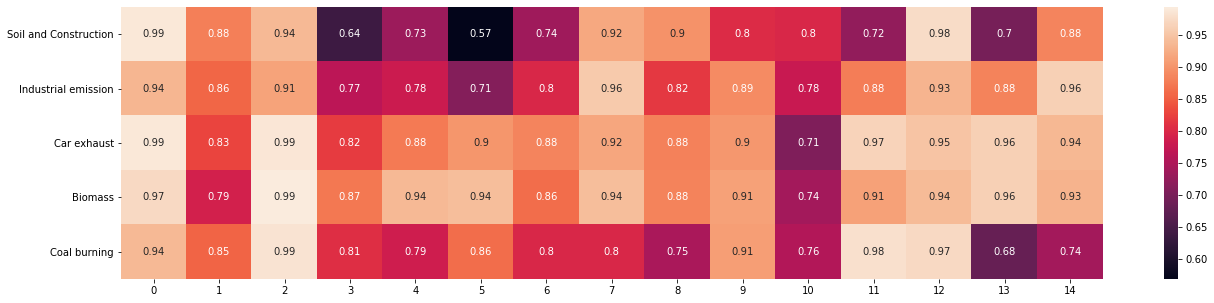

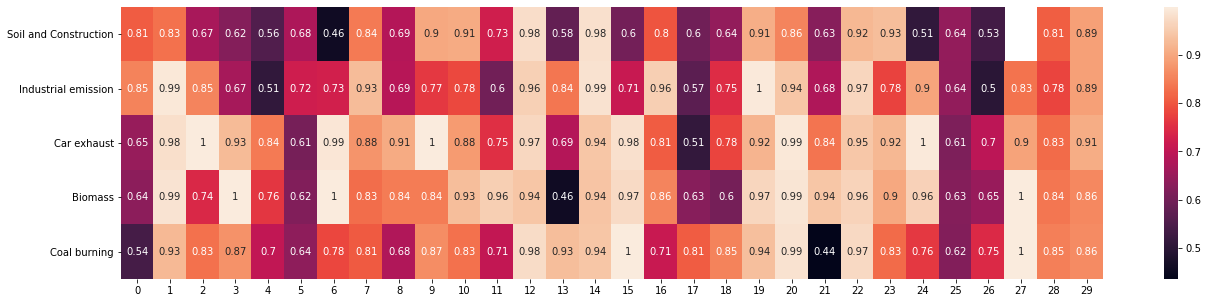

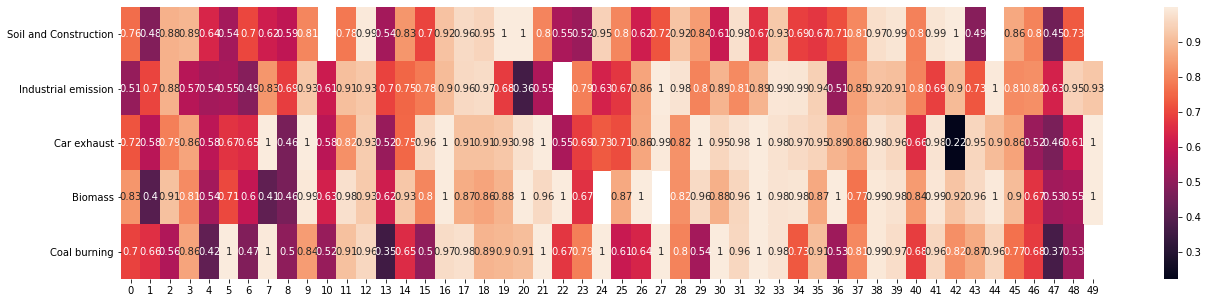

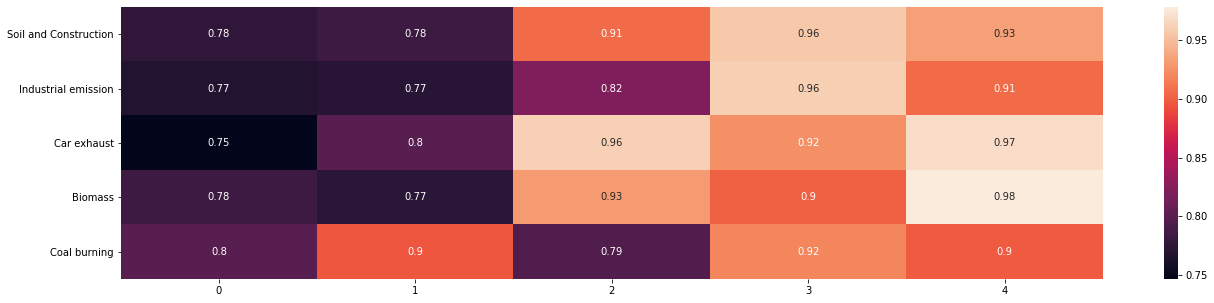

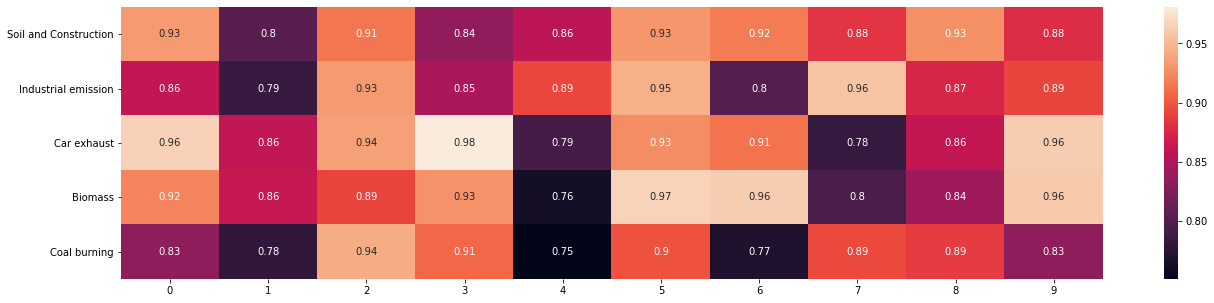

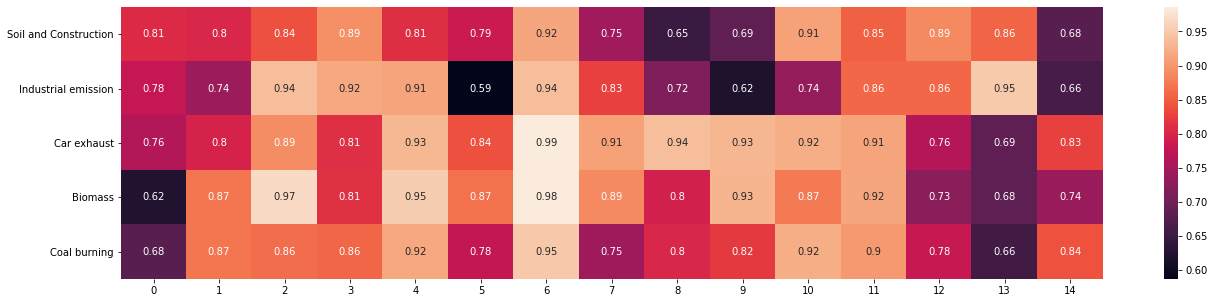

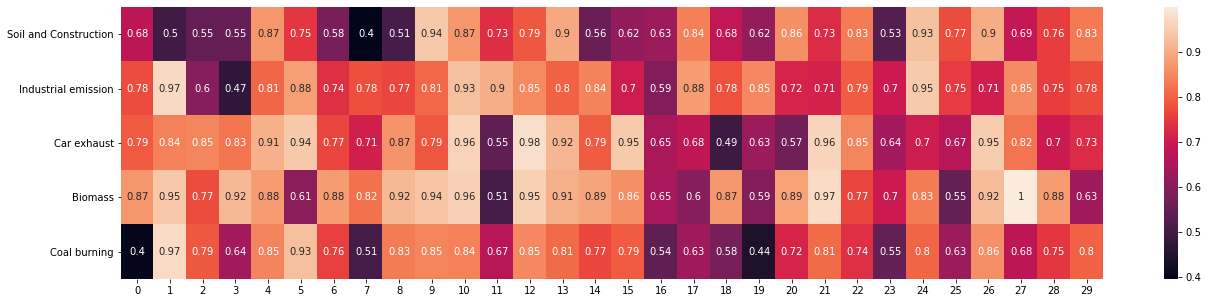

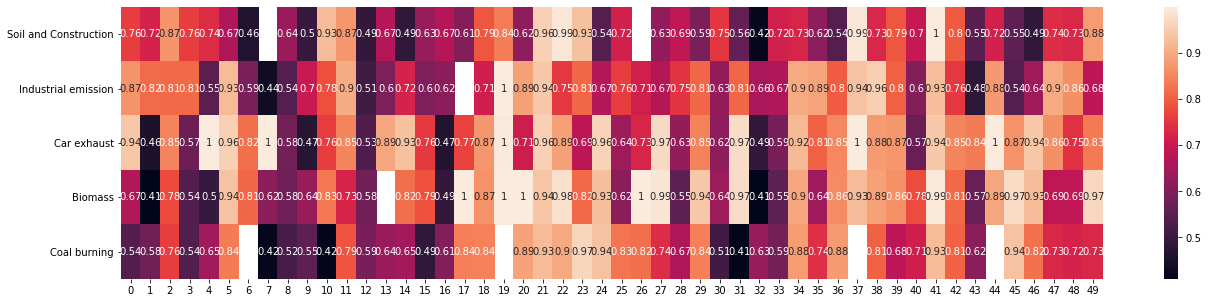

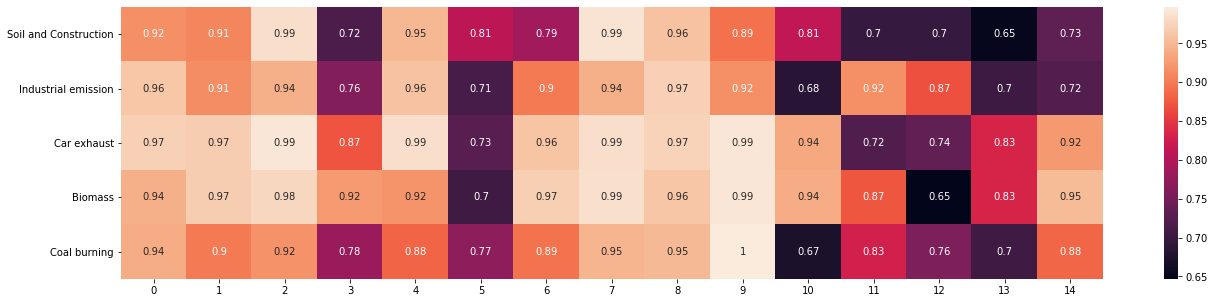

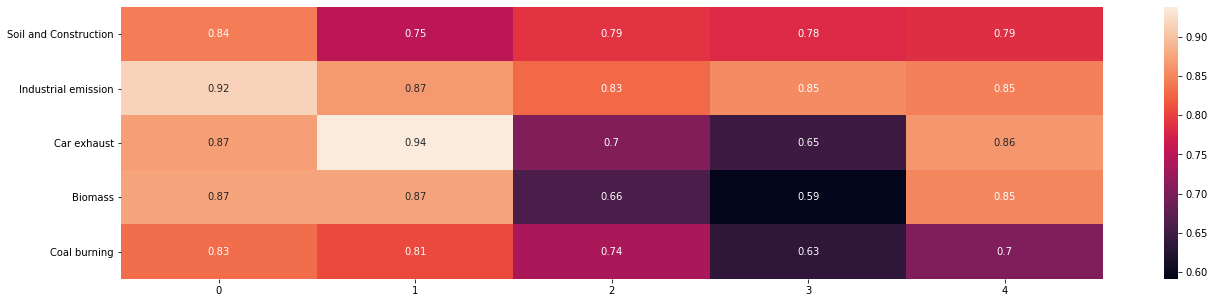

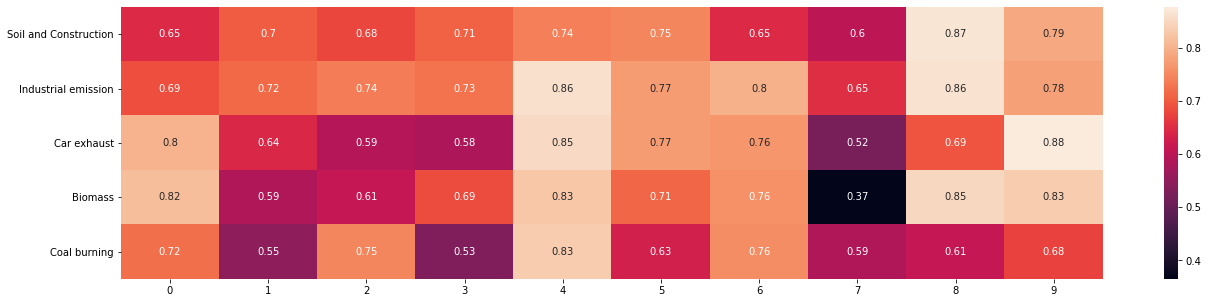

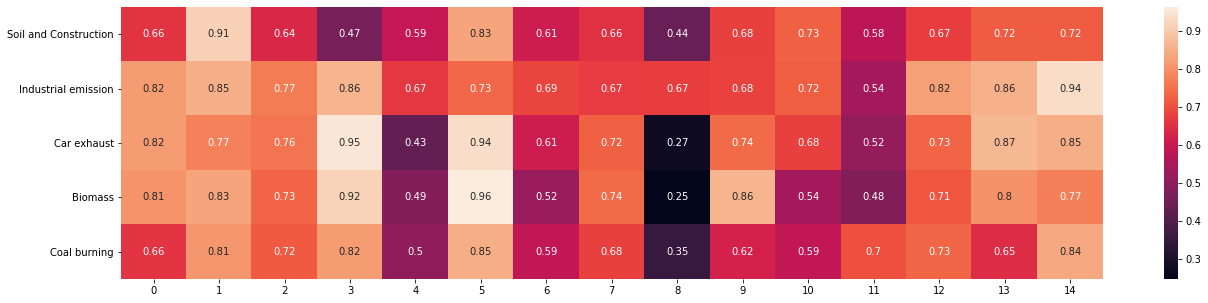

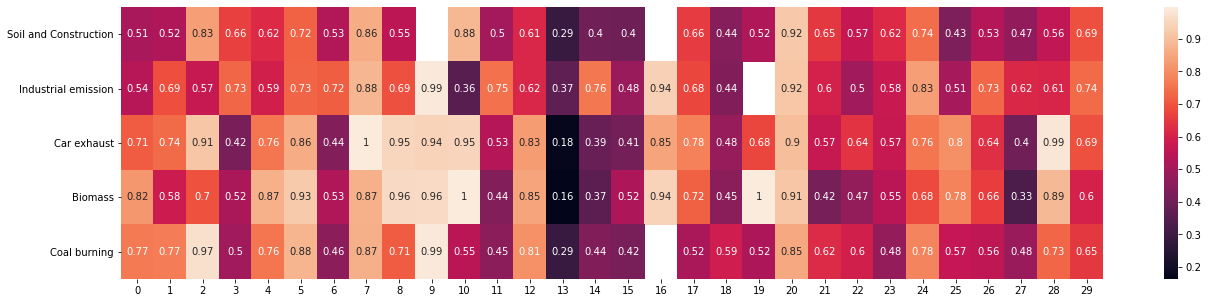

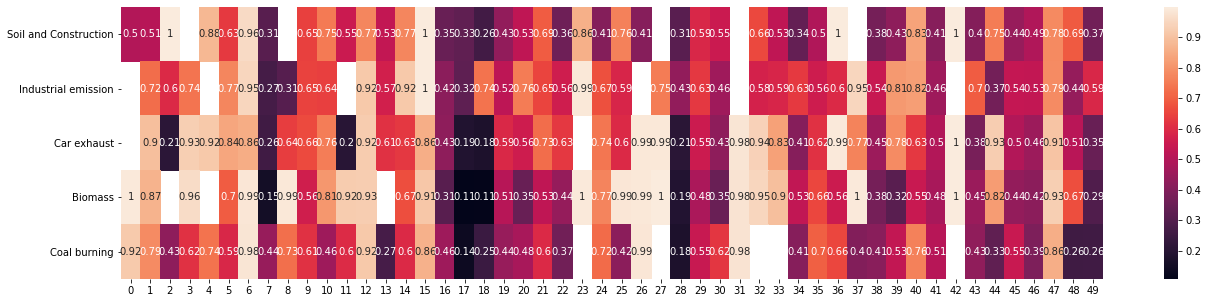

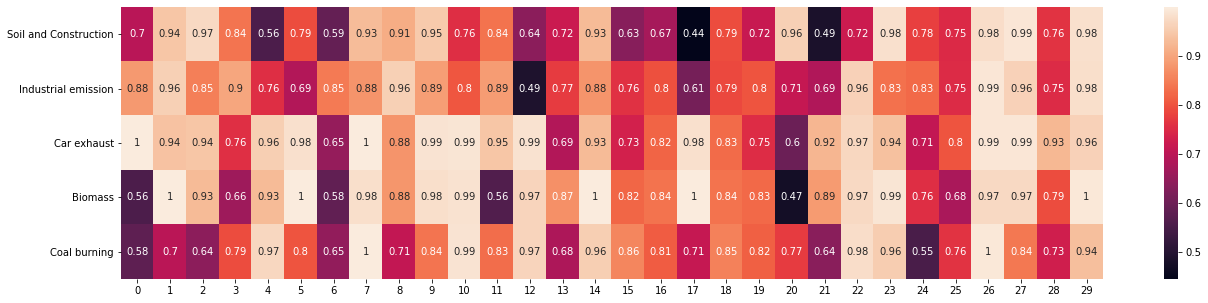

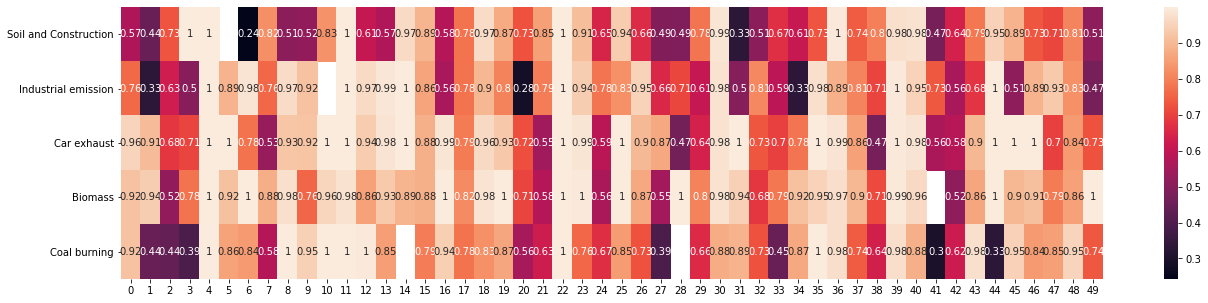

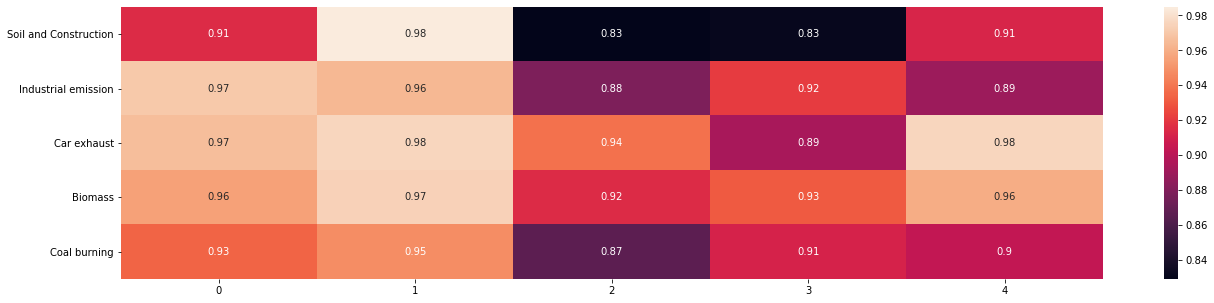

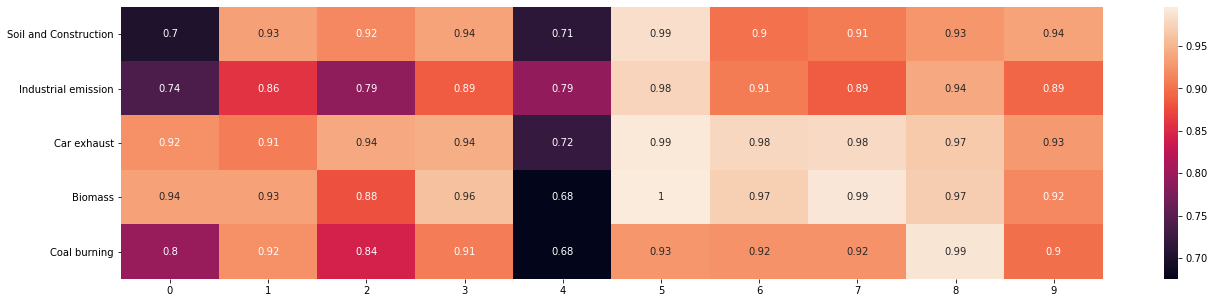

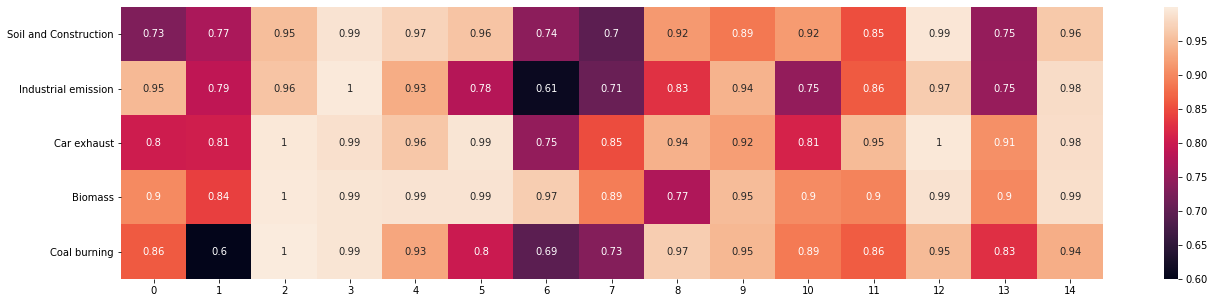

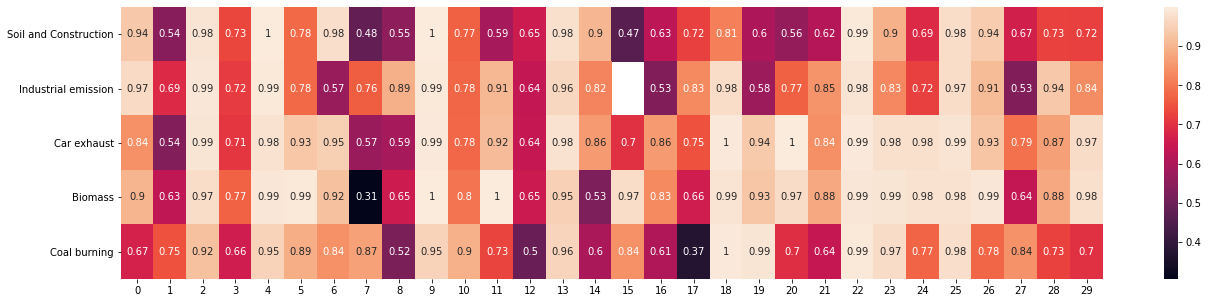

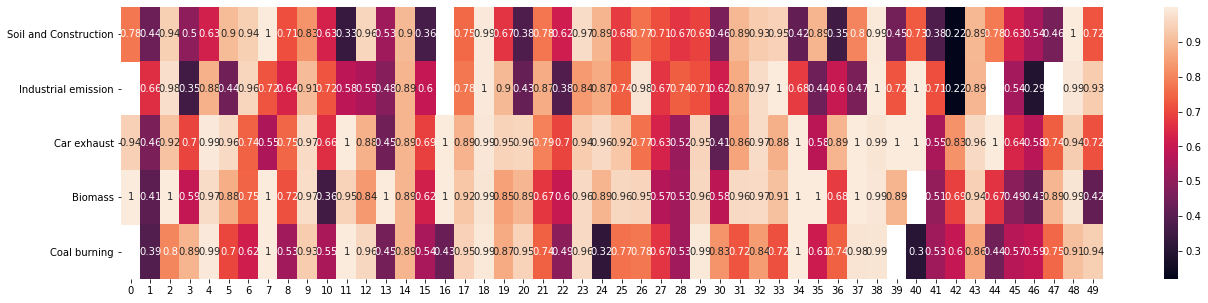

In [131]:
for i in glob.glob('models/multipleLDAmodels/LDAModelvariant**'):
    label = load_object(i)[0]
    model = load_object(i)[1]
    
    Sourceprob = model.transform(Sourcetrainingcodes)
    
    soilconconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Soil and Construction')[0]: index(Sourcetrainingdf, 'Soil and Construction')[1]].shape)
    indemissionconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Industrial emission')[0]: index(Sourcetrainingdf, 'Industrial emission')[1]].shape)
    carexhaustconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Car exhaust')[0]: index(Sourcetrainingdf, 'Car exhaust')[1]].shape)
    biomassconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Biomass')[0]: index(Sourcetrainingdf, 'Biomass')[1]].shape)
    coalburningconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Coal burning')[0]: index(Sourcetrainingdf, 'Coal burning')[1]].shape)
    
    indexconf = ['Soil and Construction', 'Industrial emission', 'Car exhaust', 'Biomass', 'Coal burning']
    conflist = [soilconconf, indemissionconf, carexhaustconf, biomassconf, coalburningconf]
    
    for indexm, matrix in zip(indexconf, conflist):
        #print(indexm)
        intermediateargmax = Sourceprob[index(Sourcetrainingdf, indexm)[0]: index(Sourcetrainingdf, indexm)[1]].argmax(axis=1)
        intermediatemax = Sourceprob[index(Sourcetrainingdf, indexm)[0]: index(Sourcetrainingdf, indexm)[1]].max(axis=1)
        for i in np.arange(0, len(matrix)):
            matrix[i, intermediateargmax[i]] = intermediatemax[i]
        
        #find the average and the count for every component
    confcountcomb = np.zeros([5, label[1]])
    confavgcomb = np.zeros([5, label[1]])
    for ind, conf in enumerate(conflist):
        confcount = np.zeros([1,label[1]])
        for inds in np.arange(0, label[1]):
            confcount[:,inds] = len(conf[:,inds][np.nonzero(conf[:,inds])])/len(conf)

        confaverage = np.zeros([1,label[1]])
        for inds in np.arange(0, label[1]):
            confaverage[:,inds] = np.average(conf[:,inds][np.nonzero(conf[:,inds])])
        confcountcomb[ind] = confcount
        confavgcomb[ind] = confaverage
        
    fig = plt.figure(figsize = (22,5))
    sns.heatmap(pd.DataFrame(confavgcomb, index = indexconf), annot = True)
    #sns.heatmap(pd.DataFrame(confcountcomb, index = indexconf), annot = True)
    print(label)

In [113]:
LDAModelsetup = np.zeros([5,5])
accumulatelist = []
accumulatedata = []
for i in glob.glob('models/multipleLDAmodels/LDAModelvariant**'):
    label = load_object(i)[0]
    model = load_object(i)[1]
    Sourceprob = model.transform(Sourcetrainingcodes)
    
    accumulatelist.append([label[0], label[1], np.average(Sourceprob.max(axis=1)),
                           np.median(Sourceprob.max(axis=1)), np.percentile(Sourceprob.max(axis = 1), 10)])
    accumulatedata.append([(label[0], label[1]), Sourceprob.max(axis = 1)])

In [114]:
hyperparams = pd.DataFrame(accumulatelist, columns = ['alpha', 'Number of clusters', 'Average', 'Median', '10th percentile'])

Text(0.5, 1.0, '10th percentile max probability')

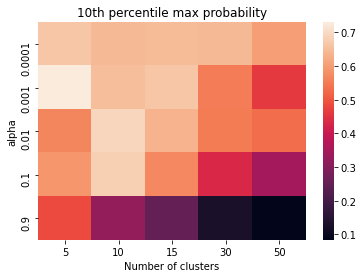

In [115]:
sns.heatmap(hyperparams.pivot_table(values = '10th percentile', index = 'alpha', columns = 'Number of clusters'))
plt.title('10th percentile max probability')

Text(0.5, 1.0, 'Median max probability')

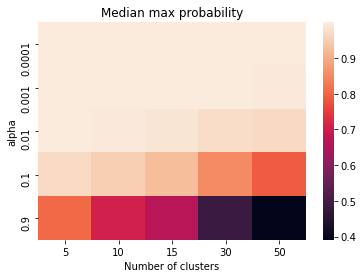

In [59]:
sns.heatmap(hyperparams.pivot_table(values = 'Median', index = 'alpha', columns = 'Number of clusters'))
plt.title('Median max probability')

Text(0, 0.5, 'Max Probability in all samples')

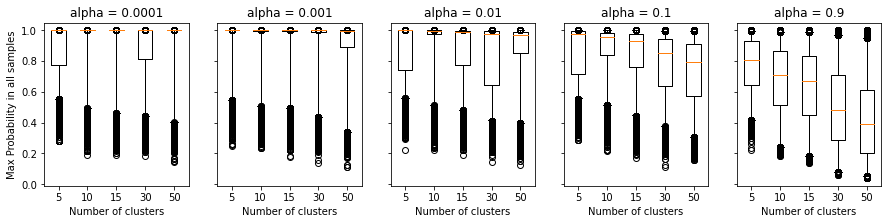

In [107]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (15,3), sharey = True)

for i, j in enumerate([0.0001, 0.001, 0.01, 0.1, 0.9]):
    index = []
    for ind in pd.DataFrame(accumulatedata)[0]:
        index.append(ind[0] == j)
    axs[i].boxplot(pd.DataFrame(accumulatedata)[1][index], labels = [5, 10, 15, 30, 50], whis = [5, 95])
    axs[i].set_title('alpha = ' + str(j))
    axs[i].set_xlabel("Number of clusters")
axs[0].set_ylabel('Max Probability in all samples')

# choose the best model and apply on samples

In [117]:
#try alpha = 0.01 and number of clusters = 10

#fit the Sourcecodes_training
from sklearn.decomposition import LatentDirichletAllocation

model2 = LatentDirichletAllocation(n_components=10, doc_topic_prior = 0.01)

In [119]:
model2 = model2.fit(Sourcetrainingcodes)

In [120]:
Qian2016prob = model2.transform(Qian2016codes)

In [133]:
maxprob = Qian2016prob.max(axis = 1)
clustermax = Qian2016prob.argmax(axis = 1)

<AxesSubplot:>

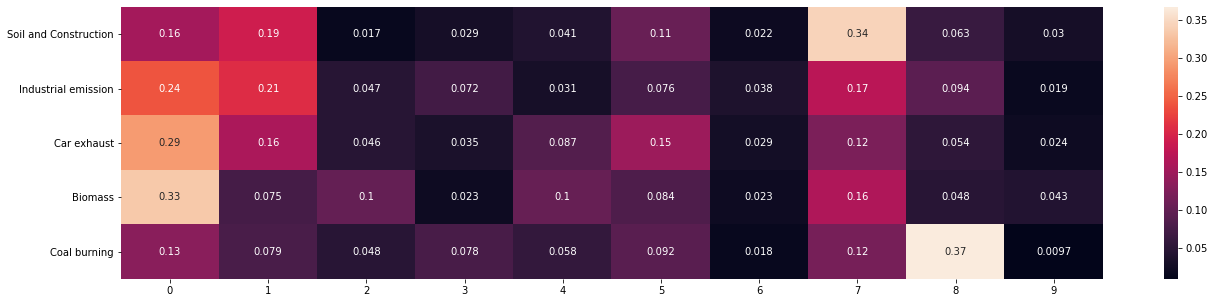

In [151]:
Sourceprob = model2.transform(Sourcetrainingcodes)
    
soilconconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Soil and Construction')[0]: index(Sourcetrainingdf, 'Soil and Construction')[1]].shape)
indemissionconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Industrial emission')[0]: index(Sourcetrainingdf, 'Industrial emission')[1]].shape)
carexhaustconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Car exhaust')[0]: index(Sourcetrainingdf, 'Car exhaust')[1]].shape)
biomassconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Biomass')[0]: index(Sourcetrainingdf, 'Biomass')[1]].shape)
coalburningconf = np.zeros(Sourceprob[index(Sourcetrainingdf, 'Coal burning')[0]: index(Sourcetrainingdf, 'Coal burning')[1]].shape)

indexconf = ['Soil and Construction', 'Industrial emission', 'Car exhaust', 'Biomass', 'Coal burning']
conflist = [soilconconf, indemissionconf, carexhaustconf, biomassconf, coalburningconf]

for indexm, matrix in zip(indexconf, conflist):
    #print(indexm)
    intermediateargmax = Sourceprob[index(Sourcetrainingdf, indexm)[0]: index(Sourcetrainingdf, indexm)[1]].argmax(axis=1)
    intermediatemax = Sourceprob[index(Sourcetrainingdf, indexm)[0]: index(Sourcetrainingdf, indexm)[1]].max(axis=1)
    for i in np.arange(0, len(matrix)):
        matrix[i, intermediateargmax[i]] = intermediatemax[i]

    #find the average and the count for every component
confcountcomb = np.zeros([5, 10])
confavgcomb = np.zeros([5, 10])
for ind, conf in enumerate(conflist):
    confcount = np.zeros([1,10])
    for inds in np.arange(0, 10):
        confcount[:,inds] = len(conf[:,inds][np.nonzero(conf[:,inds])])/len(conf)

    confaverage = np.zeros([1,10])
    for inds in np.arange(0, 10):
        confaverage[:,inds] = np.average(conf[:,inds][np.nonzero(conf[:,inds])])
    confcountcomb[ind] = confcount
    confavgcomb[ind] = confaverage

fig = plt.figure(figsize = (22,5))
#sns.heatmap(pd.DataFrame(confavgcomb, index = indexconf), annot = True)
sns.heatmap(pd.DataFrame(confcountcomb, index = indexconf), annot = True)

In [145]:
pd.DataFrame(confavgcomb, index = indexconf, columns = np.arange(1,11))

,1,2,3,4,5,6,7,8,9,10
Soil and Construction,0.906534,0.983563,0.769434,0.722383,0.881729,0.957850,0.759533,0.932427,0.884329,0.926074
Industrial emission,0.987916,0.978731,0.783636,0.766262,0.923580,0.773581,0.829095,0.902624,0.920774,0.864993
Car exhaust,0.962093,0.982008,0.848339,0.846658,0.980144,0.930521,0.913109,0.912858,0.856868,0.931594
Biomass,0.969850,0.982275,0.943907,0.728694,0.963429,0.920769,0.917512,0.894375,0.849695,0.971899
Coal burning,0.967471,0.924812,0.825570,0.776060,0.988941,0.837578,0.923489,0.826811,0.948952,0.823051


In [173]:
[(Qian2016[0][ELEMENTS].index[i], Qian2016[0][ELEMENTS].columns[j]) for i, j in np.argwhere(Qian2016[0][ELEMENTS].values > 0.0)]

[('1', '55Mn'),
 ('1', '54Fe'),
 ('1', '121Sb'),
 ('1', '208Pb'),
 ('2', '55Mn'),
 ('6', '53Cr'),
 ('6', '55Mn'),
 ('6', '54Fe'),
 ('6', '58Ni'),
 ('8', '208Pb'),
 ('9', '55Mn'),
 ('10', '208Pb'),
 ('11', '54Fe'),
 ('12', '138Ba'),
 ('13', '55Mn'),
 ('14', '120Sn'),
 ('14', '208Pb'),
 ('16', '54Fe'),
 ('19', '78Se'),
 ('23', '208Pb'),
 ('26', '88Sr'),
 ('30', '208Pb'),
 ('31', '138Ba'),
 ('31', '208Pb'),
 ('32', '90Zr'),
 ('33', '54Fe'),
 ('33', '208Pb'),
 ('35', '54Fe'),
 ('38', '54Fe'),
 ('39', '208Pb'),
 ('41', '63Cu'),
 ('41', '120Sn'),
 ('42', '58Ni'),
 ('43', '208Pb'),
 ('44', '48Ti'),
 ('44', '55Mn'),
 ('44', '54Fe'),
 ('44', '208Pb'),
 ('45', '48Ti'),
 ('45', '55Mn'),
 ('45', '54Fe'),
 ('45', '64Zn'),
 ('45', '208Pb'),
 ('46', '58Ni'),
 ('47', '48Ti'),
 ('48', '208Pb'),
 ('52', '48Ti'),
 ('52', '54Fe'),
 ('52', '90Zr'),
 ('55', '54Fe'),
 ('55', '120Sn'),
 ('57', '55Mn'),
 ('57', '54Fe'),
 ('58', '55Mn'),
 ('58', '54Fe'),
 ('58', '208Pb'),
 ('59', '54Fe'),
 ('60', '64Zn'),
 ('61